In [78]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from data_methods import XTrees_analysis

ImportError: cannot import name 'XTrees_analysis' from 'data_methods' (/Users/ajoshi/GH/Bytes0x400/Project2/data_methods.py)

In [63]:
# import data
df = pd.read_csv('sports_management_encoded.csv')
df.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [66]:
# split the data into features and target
X = df.drop(columns=['Sustainability Score'])
y = df['Sustainability Score']


In [67]:
ExtraTrees_methods(X, y, 42, 'Feature Importance for entire dataset (Sustainability Score)')

TypeError: ExtraTrees_methods() takes 2 positional arguments but 4 were given

In [26]:
# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split


In [27]:
# create a function for the ExtraTreesClassifier
def ExtraTreesClassifier_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = ExtraTreesClassifier(random_state=42).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
    return clf

In [28]:
# create a function to find the feature importance
def feature_importance(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = ExtraTreesClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
    feature_importances = clf.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 5))
    sorted_idx = np.argsort(feature_importances)
    sortedfeature_names = feature_names[sorted_idx]
    plt.barh(sortedfeature_names, feature_importances[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.show()
    return sorted(zip(feature_importances, feature_names), reverse=True)


In [29]:
# create a function for the depth parameter
def ExtraTreesClassifier_model_depth(X, y, depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = ExtraTreesClassifier(max_depth=depth, random_state=42).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
   
    return clf


In [31]:
# run the ExtraTreesClassifier model
ExtraTreesClassifier_model(X, y)


Training Score: 0.9763790849673203
Testing Score: 0.43019607843137253


ExtraTreesClassifier(random_state=42)

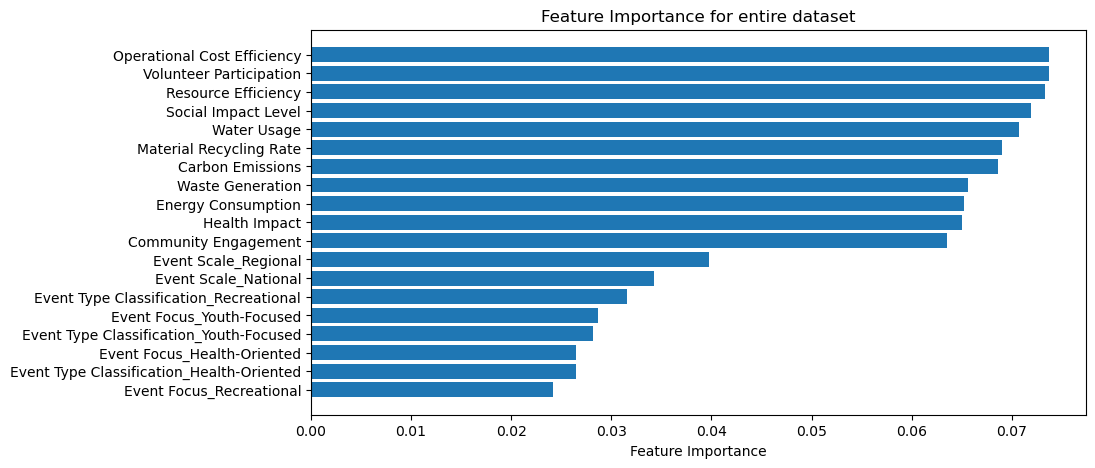

[(0.07371564951713397, 'Operational Cost Efficiency'),
 (0.07368691884361588, 'Volunteer Participation'),
 (0.07332993678615995, 'Resource Efficiency'),
 (0.07194948433622342, 'Social Impact Level'),
 (0.07076034924938361, 'Water Usage'),
 (0.0690084300132019, 'Material Recycling Rate'),
 (0.06862941977503492, 'Carbon Emissions'),
 (0.06564356240403903, 'Waste Generation'),
 (0.06518956264531597, 'Energy Consumption'),
 (0.06502157438713456, 'Health Impact'),
 (0.06347799207215883, 'Community Engagement'),
 (0.0397760207638618, 'Event Scale_Regional'),
 (0.03428285299665482, 'Event Scale_National'),
 (0.03158186728060795, 'Event Type Classification_Recreational'),
 (0.028681188435842962, 'Event Focus_Youth-Focused'),
 (0.028143391582105416, 'Event Type Classification_Youth-Focused'),
 (0.02649051380861775, 'Event Focus_Health-Oriented'),
 (0.02642737609666753, 'Event Type Classification_Health-Oriented'),
 (0.024203909006239657, 'Event Focus_Recreational')]

In [32]:
# run the feature importance function
feature_importance(X, y, 'Feature Importance for entire dataset')

In [33]:
# run the ExtraTreesClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    ExtraTreesClassifier_model_depth(X, y, i)
    

Depth: 1
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 2
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 3
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 4
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 5
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 6
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 7
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 8
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 9
Training Score: 0.4988235294117647
Testing Score: 0.491843137254902
Depth: 10
Training Score: 0.5002222222222222
Testing Score: 0.49180392156862746
Depth: 11
Training Score: 0.5080130718954249
Testing Score: 0.49176470588235294
Depth: 12
Training Score: 0.5318692810457516
Testing Score: 0.4914117647058823
Depth: 13
Training Score: 0.5783660130718954
Testing Score: 0.491019

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [ ]:
# Model to target only sustainability columns we believe should be included in the model
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Water Usage', 'Waste Generation', 'Material Recycling Rate', 'Sustainability Score']
df_sustainable = df[sustainability_columns]
df_sustainable.head(10)

,Energy Consumption,Carbon Emissions,Water Usage,Waste Generation,Material Recycling Rate,Sustainability Score
0,1.0,2.0,1.0,2.0,1.0,0.0
1,2.0,1.0,1.0,2.0,0.0,1.0
2,2.0,2.0,1.0,2.0,1.0,2.0
3,2.0,2.0,1.0,2.0,1.0,2.0
4,1.0,2.0,2.0,0.0,2.0,0.0
5,1.0,1.0,1.0,2.0,0.0,2.0
6,0.0,2.0,1.0,1.0,1.0,2.0
7,2.0,2.0,0.0,1.0,0.0,1.0
8,2.0,2.0,0.0,1.0,0.0,1.0
9,2.0,2.0,0.0,2.0,0.0,0.0


In [43]:
# Model to target only sustainability columns as indicated by the dataset creator
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Sustainability Score']
df_sustainable_creator = df[sustainability_columns]
df_sustainable_creator.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Sustainability Score
0,1.0,2.0,2.0,0.0
1,2.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,1.0,2.0,0.0,0.0
5,1.0,1.0,2.0,2.0
6,0.0,2.0,1.0,2.0
7,2.0,2.0,1.0,1.0
8,2.0,2.0,1.0,1.0
9,2.0,2.0,2.0,0.0


In [44]:
# Model for Social Impact Feature as indicated by the dataset creator
social_imp_columns = ['Community Engagement', 'Volunteer Participation','Health Impact','Social Impact Level']
df_social_impact = df[social_imp_columns]
df_social_impact.head(10)

,Community Engagement,Volunteer Participation,Health Impact,Social Impact Level
0,1.0,1.0,1.0,2.0
1,1.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0
5,1.0,2.0,0.0,0.0
6,1.0,0.0,1.0,1.0
7,2.0,0.0,2.0,2.0
8,2.0,1.0,2.0,0.0
9,1.0,2.0,1.0,1.0


In [45]:
# Model for Resource Efficiency Feature as indicated by the dataset creator
resource_eff_columns = ['Operational Cost Efficiency', 'Water Usage', 'Material Recycling Rate', 'Resource Efficiency']
df_resource_efficiency = df[resource_eff_columns]
df_resource_efficiency.head(10)

,Operational Cost Efficiency,Water Usage,Material Recycling Rate,Resource Efficiency
0,2.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,2.0
4,2.0,2.0,2.0,1.0
5,1.0,1.0,0.0,1.0
6,2.0,1.0,1.0,1.0
7,2.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,2.0,0.0,0.0,1.0


In [ ]:
# Model for Event Type Feature as indicated by the dataset creator
